# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.head()

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,...,5,3,6,5,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
annual_income,2173.0,52266.031293,25274.007394,1730.0,35196.00,51411.0,68487.00,666666.0
num_children,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
num_teenagers,2196.0,0.506375,0.543720,0.0,0.00,0.0,1.00,2.0
days_since_last_purchase,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
has_recent_complaint,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
spend_wine,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
spend_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
spend_meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


# Exploratory Data Analysis

## Birth years

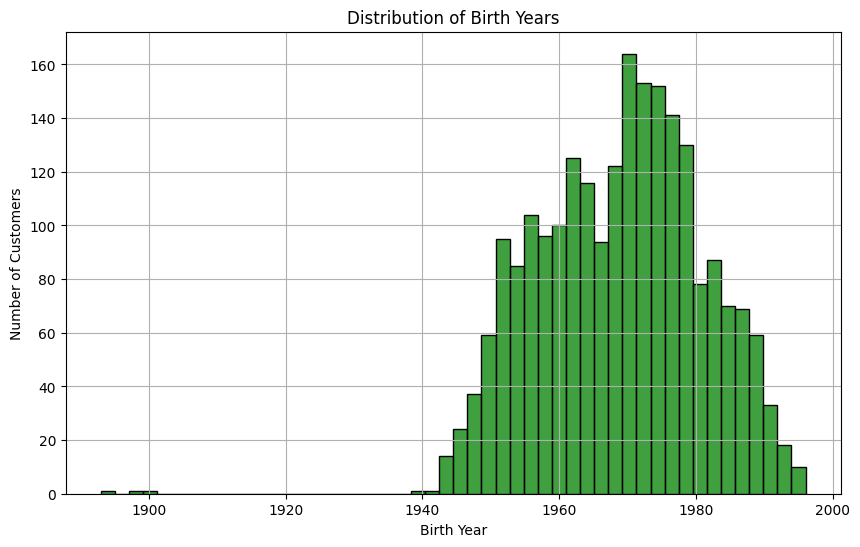

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['birth_year'], bins=50, kde=False ,color='green')
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Distribution of Spending

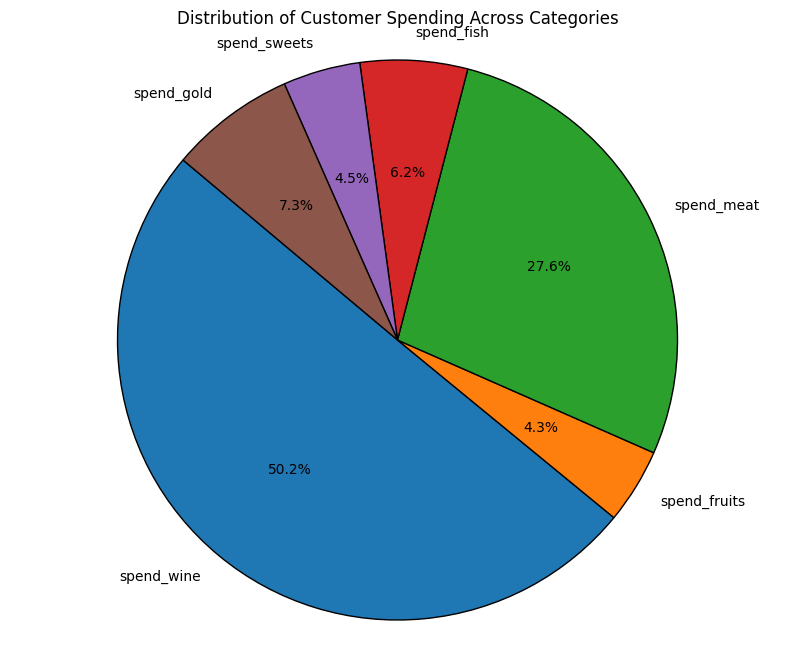

In [25]:
spend_columns = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']
total_spend_per_category = df[spend_columns].sum()

plt.figure(figsize=(10, 8))
plt.pie(total_spend_per_category, labels=total_spend_per_category.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Customer Spending Across Categories')
plt.axis('equal')
plt.show()

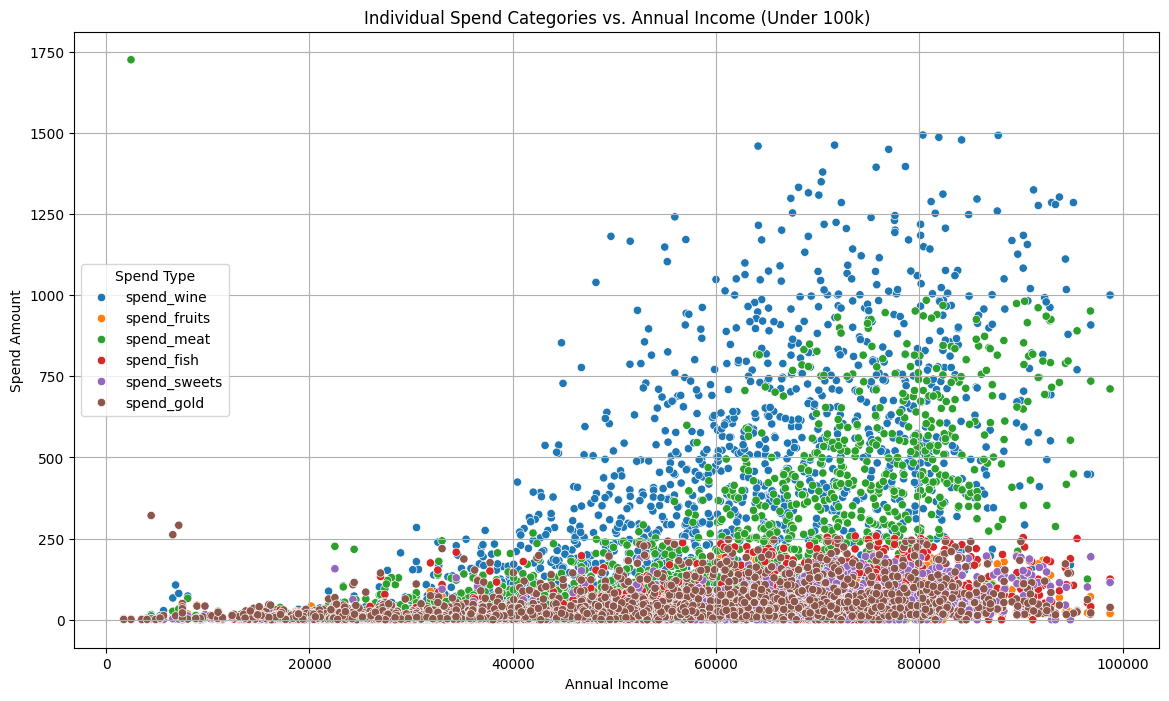

In [30]:
spend_cols = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']

# Drop rows with missing annual_income and filter for annual income under 100k
df_filtered = df.dropna(subset=['annual_income']).copy()
df_filtered = df_filtered[df_filtered['annual_income'] < 100000]

# Melt the dataframe to long format for plotting individual spend categories
df_melted = df_filtered.melt(id_vars=['annual_income'], value_vars=spend_cols, var_name='spend_type', value_name='spend_amount')

plt.figure(figsize=(14, 8))
sns.scatterplot(x='annual_income', y='spend_amount', hue='spend_type', data=df_melted)
plt.title('Individual Spend Categories vs. Annual Income (Under 100k)')
plt.xlabel('Annual Income')
plt.ylabel('Spend Amount')
plt.legend(title='Spend Type')
plt.grid(True)
plt.show()